In [61]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import cv2
import glob
import matplotlib.pylab as pl

In [3]:
#open folder with images
#and save all images in the array

images=glob.glob("/Users/anna/Desktop/imgs/stack/*.png")
stack_of_imgs = []
for image in images:
    img = Image.open(image)
    stack_of_imgs.append(img)

In [51]:
stack_12 = stack_of_imgs[:12]

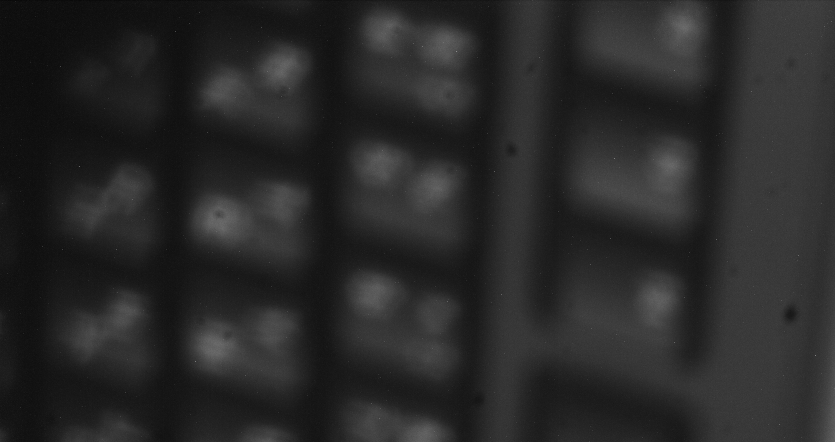

In [77]:
stack_12[4]

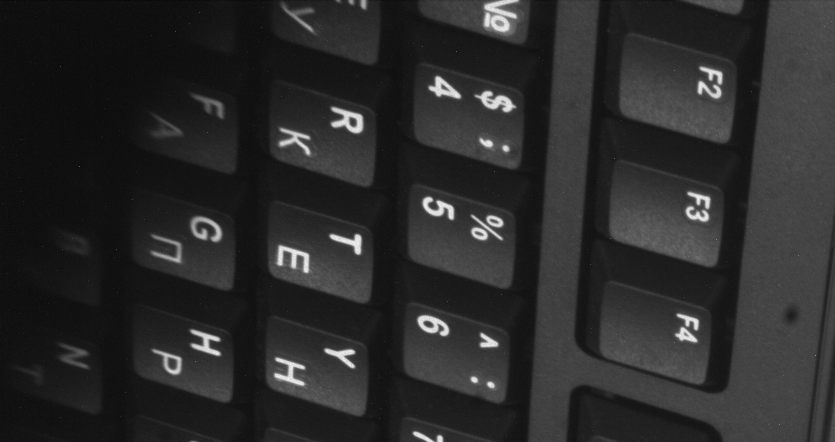

In [55]:
stack_12[10]

In [73]:
# Define containers
average_gradient = []

for im in stack_12:
    # Calculate the gradient
    sobelx = cv2.Sobel(np.float32(im), cv2.CV_64F ,1 , 0, ksize=5)
    sobely = cv2.Sobel(np.float32(im),cv2.CV_64F,0,1,ksize=5)

    abs_sobel_x = cv2.convertScaleAbs(sobelx) # converting back to uint8
    abs_sobel_y = cv2.convertScaleAbs(sobely)
    #print(abs_sobel_x )

    # Combine the two gradients with equal weight
    dst = cv2.addWeighted(abs_sobel_x,0.5,abs_sobel_y,0.5,0)
    #print(dst)

    # Calculate the average gradient for the image
    # I convert it to a numpy array for ease of calculation
    average_gradient.append(pl.asarray(dst).mean())

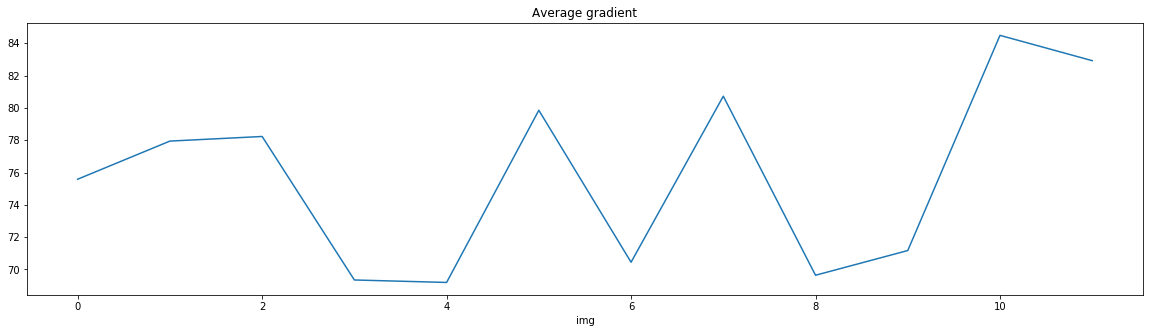

In [76]:
plt.figure(figsize=(20,5))
plt.plot(average_gradient)
plt.title("Average gradient")
plt.xlabel('img')
plt.savefig('gradient.png')